## Financial Time Series

### Data Import via yfinance

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import scipy.stats as si
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [3]:
initial_data = yf.download("DIS", start="2020-03-01", end="2021-03-02")

[*********************100%***********************]  1 of 1 completed


In [4]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,119.129997,119.980003,116.029999,119.980003,119.980003,21775900
2020-03-03,121.150002,121.779999,115.150002,116.449997,116.449997,19529700
2020-03-04,118.959999,119.239998,115.480003,119.180000,119.180000,13842100
2020-03-05,116.860001,116.959999,112.110001,113.980003,113.980003,22397200
2020-03-06,110.760002,115.870003,110.320000,115.269997,115.269997,22899600


In [5]:
initial_data['Adj Close'].head()

Date
2020-03-02    119.980003
2020-03-03    116.449997
2020-03-04    119.180000
2020-03-05    113.980003
2020-03-06    115.269997
Name: Adj Close, dtype: float64

In [6]:
data1 =  initial_data['Adj Close'] 
data = pd.DataFrame(data1).dropna()

Set the Adj Closed data as a new DataFrame we will use.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-03-02 to 2021-03-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [8]:
data.head()

,Adj Close
Date,
2020-03-02,119.980003
2020-03-03,116.449997
2020-03-04,119.180000
2020-03-05,113.980003
2020-03-06,115.269997


In [9]:
data.tail()

,Adj Close
Date,
2021-02-23,197.089996
2021-02-24,197.509995
2021-02-25,190.979996
2021-02-26,189.039993
2021-03-01,194.979996


array([<AxesSubplot:xlabel='Date'>], dtype=object)

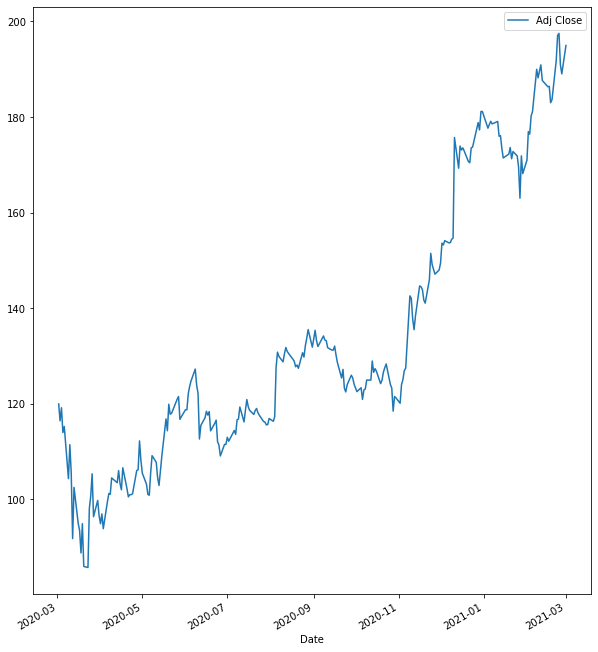

In [10]:
data.plot(figsize=(10, 12), subplots=True)

### Summary Statistics

In [11]:
data.describe().round(2)

,Adj Close
count,252.00
mean,132.61
std,27.49
min,85.76
25%,115.43
50%,124.88
75%,148.28
max,197.51


### Changes over Time

There are multiple options to calculate the changes in a time series over time, including absolute differences, percentage changes, and logarithmic (log) returns.

First, the absolute differences, for which pandas provides a special method:

In [12]:
data.diff().head()

,Adj Close
Date,
2020-03-02,NaN
2020-03-03,-3.530006
2020-03-04,2.730003
2020-03-05,-5.199997
2020-03-06,1.289993


In [13]:
data.diff().describe().round(2)

,Adj Close
count,251.00
mean,0.30
std,3.75
min,-13.70
25%,-1.52
50%,0.04
75%,1.82
max,21.03


From a statistics point of view, absolute changes are not optimal because they are dependent on the scale of the time series data itself. Therefore, percentage changes are usually preferred. The following code derives the percentage changes or percentage returns (also: simple returns) in a financial context and visualizes their mean values per column:

In [14]:
data.pct_change().round(4).head()

,Adj Close
Date,
2020-03-02,NaN
2020-03-03,-0.0294
2020-03-04,0.0234
2020-03-05,-0.0436
2020-03-06,0.0113


As an alternative to percentage returns, log returns can be used. In some scenarios, they are easier to handle and therefore often preferred in a financial context.

In [15]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,Adj Close
Date,
2020-03-02,NaN
2020-03-03,-0.0299
2020-03-04,0.0232
2020-03-05,-0.0446
2020-03-06,0.0113


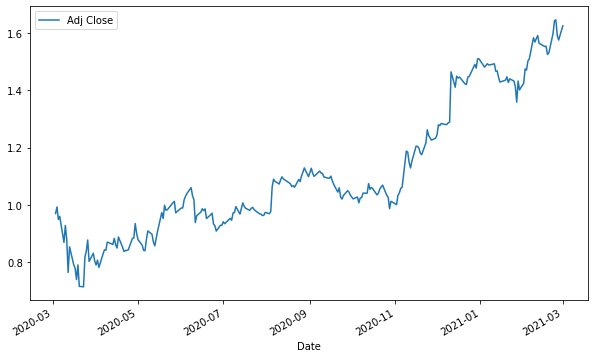

In [16]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

### Resampling

Resampling is an important operation on financial time series data. Usually this takes the form of downsampling, meaning that, for example, a tick data series is resampled to one-minute intervals or a time series with daily observations is resampled to one with weekly or monthly observations

In [17]:
data.resample('1w', label='right').last().head()

,Adj Close
Date,
2020-03-08,115.269997
2020-03-15,102.519997
2020-03-22,85.980003
2020-03-29,96.400002
2020-04-05,93.879997


In [18]:
data.resample('1m', label='right').last().head()

,Adj Close
Date,
2020-03-31,96.599998
2020-04-30,108.150002
2020-05-31,117.300003
2020-06-30,111.510002
2020-07-31,116.940002


<AxesSubplot:xlabel='Date'>

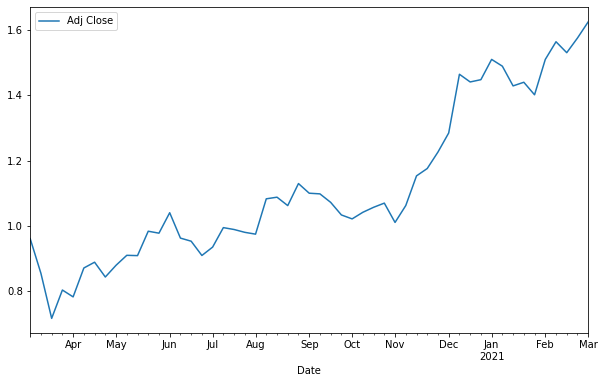

In [19]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

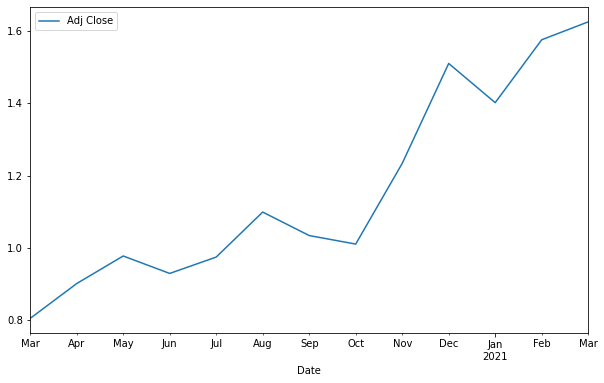

In [20]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

In [21]:
normal_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.029421622853183633,
 0.023443567440770148,
 -0.04363145607423161,
 0.011317715811019407,
 -0.09473408941581817]

In [22]:
log_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.029863120080300263,
 0.02317298775570592,
 -0.044611934020655955,
 0.01125414963176207,
 -0.09952655459006]

# Annualised volatility for 12 months

In [23]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annualized normal return for 12 months is %.8f and its annualized volatility for 12 months is %.8f' % (nr,nv))

The annualized normal return for 12 months is 0.60647599 and its annualized volatility for 12 months is 0.49431441


In [24]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annualized log return for 12 months is %.8f and its annualized volatility for 12 months is %.8f' % (lr,lv))

The annualized log return for 12 months is 0.48557188 and its annualized volatility for 12 months is 0.49053746


In [32]:
normal_return_6M=normal_return[125:]
normal_return_6M [:3]

[0.013534716342034674, -0.02707686550638772, 0.012739880160588144]

# Annualised volatility for 6 months

In [33]:
dfnr_6M= pd.DataFrame(normal_return_6M, columns = ['normal_6M']) 
nr_6M = dfnr_6M.mean() * len(dfnr)
nv_6M= dfnr_6M.std() * (len(dfnr) ** 0.5)
print('The annualized normal return for six months is %.8f and its annualized volatility for six months is %.8f' % (nr_6M,nv_6M))

The annualized normal return for six months is 0.82222226 and its annualized volatility for six months is 0.38238713


In [34]:
log_return_6M=log_return[125:]
log_return_6M [:3]

[0.01344394023745888, -0.02745019838161625, 0.012659410614883558]

In [35]:
dflr_6M = pd.DataFrame(log_return_6M, columns = ['log_6M']) 
lr_6M = dflr_6M.mean() * len(dflr)
lv_6M = dflr_6M.std() * (len(dflr) ** 0.5)
print('The annualized log return for six months is %.8f and its annualized volatility for six months is %.8f' % (lr_6M,lv_6M))

The annualized log return for six months is 0.75115566 and its annualized volatility for six months is 0.37194062


# Binomial Tree

Data Input

In [163]:
S0 = 185.92              # spot stock price
K = 180                  # strike
T = 4/52                 # maturity 
r = 0.0163               # risk free rate 
sig = 0.494              # diffusion coefficient or volatility
N = 8                    # number of periods or number of time steps  
payoff = "put"           # payoff 

In [164]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [165]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [166]:
S

array([[185.92      , 195.14778807, 204.83357997, 215.00010786,
        225.67123216, 236.87199756, 248.6286918 , 260.96890735,
        273.9216062 ],
       [  0.        , 177.12855853, 185.92      , 195.14778807,
        204.83357997, 215.00010786, 225.67123216, 236.87199756,
        248.6286918 ],
       [  0.        ,   0.        , 168.75283049, 177.12855853,
        185.92      , 195.14778807, 204.83357997, 215.00010786,
        225.67123216],
       [  0.        ,   0.        ,   0.        , 160.77315841,
        168.75283049, 177.12855853, 185.92      , 195.14778807,
        204.83357997],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        153.17081433, 160.77315841, 168.75283049, 177.12855853,
        185.92      ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 145.92795584, 153.17081433, 160.77315841,
        168.75283049],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.    

In [167]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4895094499872968

### Step 2: Find option value at each final node

At each final node of the tree-i.e. at expiration of the option-the option value is simply its intrinsic, or exercise, value:
Max[(S_n-K),0] for a call option and Max[(K-S_n),0] for a put option, where K is the strike price and S_n is the spot price of the underlying asset at the n-th period.

In [168]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
V[:,-1] = np.where (K>S_T,1,0.0) 
V

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

### Step 3: Find option value at earlier nodes

Once the above step is complete, the option value is then found for each node, starting at the penultimate time step, and working back to the first node of the tree (the valuation date) where the calculated result is the value of the option.

#### Binary Put

In [169]:
# for Binary put Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.38597555, 0.24386429, 0.11940991, 0.03464162, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.52236457, 0.36327848, 0.20073089, 0.06787011,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.67507263, 0.51925693, 0.32819274,
        0.13297161, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.82469159, 0.70262784,
        0.51549108, 0.26051893, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.94199175,
        0.88228905, 0.76014219, 0.51041055, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.99952992, 0.99968659, 0.99984328, 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.99968659, 0.99984328, 1.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.99984328, 1.        ],


In [170]:
print('Binary ' + payoff, str( V[0,0]))

Binary put 0.38597555048451143


## Monte Carlo Simulation

It still has one Python loop, namely over the time intervals. The other dimension is handled by vectorized code over all paths.

In [4]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [5]:
T = 4/52
r = 0.0163
sigma = 0.494
S0 = 185.92
K = 180

In [6]:
S = mcs_simulation_np(2000)

In [7]:
S = np.transpose(S)
S

array([[185.92      , 185.40959191, 184.81167682, ..., 184.48742165,
        184.80641836, 184.81290075],
       [185.92      , 185.35484073, 185.31115642, ..., 198.49758234,
        198.80774559, 198.76268407],
       [185.92      , 186.00071869, 185.42117848, ..., 245.10583502,
        244.68495862, 244.42061582],
       ...,
       [185.92      , 185.63535255, 187.06646763, ..., 196.08003285,
        196.51429689, 195.94016807],
       [185.92      , 185.96464977, 185.31870775, ..., 227.48377317,
        228.1345491 , 227.67045738],
       [185.92      , 185.89787174, 185.66962154, ..., 185.50738691,
        184.68140644, 184.48378976]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

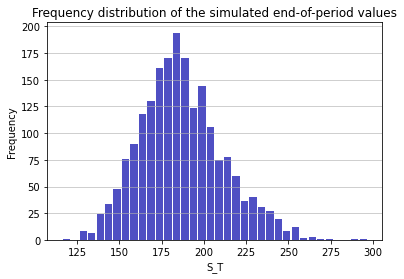

In [8]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

In [9]:
p = np.mean(np.where (K > S[:,-1],1,0)) 
print('Binary put', str(p))

Binary put 0.4145


# Greeks

# Theta

Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay".

In [101]:
def theta(S, E, T, r, vol):
    d1 = (np.log(S / E) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / E) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    theta_put =(r*np.exp(-r*T)*(1-si.norm.cdf(d2,0.0,1.0))-np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0)*((d1/2*T)-(r/(vol*np.sqrt(T)))))
    return theta_put

In [107]:
theta (185.92, 180, 4/52 , 0.0163, 0.494)

0.048929217231869826

In [121]:
T = np.linspace(0.25,3,12)
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(185.92 , 180, T [i], 0.0163, 0.494)

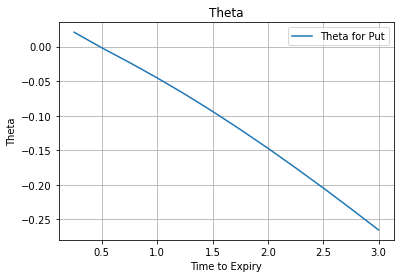

In [122]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

Speed

In [202]:
def speed(S,E,T,r,vol):
    d1= (np.log(S/E)+(r+0.5*vol**2)*T)/(vol*np.sqrt(T))
    d2= (np.log(S/E)+(r-0.5*vol**2)*T)/(vol*np.sqrt(T))
    speed_put= (np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0)/(vol**2*S**3*T))*(-2*d1+(1-(d1*d2))/(vol*np.sqrt(T)))
    return speed_put

In [203]:
speed (185.92, 180, 4/52 , 0.0163, 0.494)

2.037391372057374e-05

In [206]:
S = np.linspace(100,250,20)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 180, 4/52, 0.0163, 0.494)

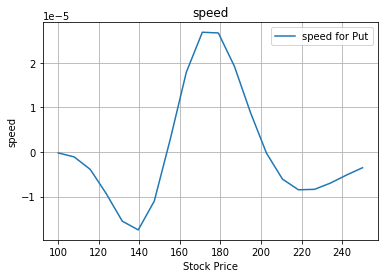

In [208]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('speed')
plt.title('speed')
plt.legend(['speed for Put'])

# Gamma

Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.

In [115]:
def gamma(S, K, T, r, vol):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = (np.exp(-r * T) * d1 * si.norm.pdf(d2, 0.0, 1.0)) / ((vol ** 2) * (S ** 2) * T)
    
    return gamma

In [116]:
gamma (185.92, 180, 4/52 , 0.0163, 0.494)

0.00018972332810795084

In [178]:
S = np.linspace(100,250,20)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 180 , 4/52, 0.0163, 0.494)

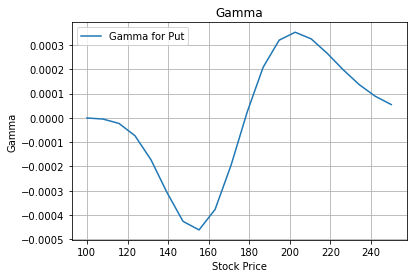

In [179]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

# Delta

Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

In [190]:
def delta(S, K, T, r, vol):
    
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    delta = - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)/ (vol * S * np.sqrt(T))
    
    return delta

In [191]:
delta (185.92, 180, 4/52 , 0.0163, 0.494)

-0.015399063110551553

In [192]:
S = np.linspace(100,250,20)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 180, 4/52, 0.0163, 0.494)

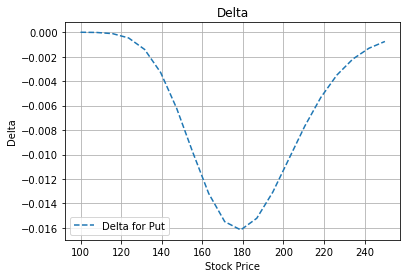

In [193]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

# Rho

Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [2]:
def rho(S,E,T,r,vol):
    d2= (np.log(S/E)+(r-0.5*vol**2)*T)/(vol*np.sqrt(T))
    rho = - T * np.exp(-r * T) * (1-si.norm.cdf(d2,0.0,1.0)) -(si.norm.cdf(- np.sqrt(T)/ vol)* np.exp(-r * T) * (1-si.norm.pdf(d2,0.0,1.0)))   
    return rho

In [6]:
rho (185.92, 180, 4/52 , 0.0163, 0.494)

-0.2072345097736395

In [7]:
r = np.linspace(0,0.07,11)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(185.92, 180, 4/52, r[i], 0.494)

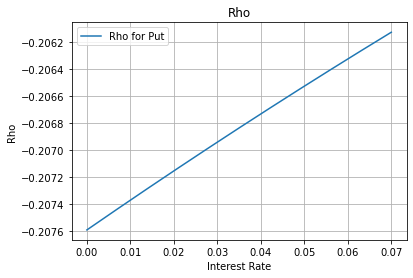

In [8]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])